# Chapter 3 - Lab - Linear Regression (Boston Homes)

![](https://www.realestateconsulting.com/wp-content/uploads/2017/12/BMIFeature-Where-Are-We-In-Housing-Cycle.png)

Source - [ISLR - Chapter 3](http://www-bcf.usc.edu/~gareth/ISL/)

Notebook - [mscaudill / IntroStatLearn](https://github.com/mscaudill/IntroStatLearn)


Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

### Loading Libraries and Datasets

In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots
#plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Loading the Boston Dataset

We will be loading the Boston dataset that comes from the `sklearn` package which records median house value for 506 neighborhoods around Boston. 

In [14]:
# load datasets
from sklearn.datasets import load_boston # boston data set is part of sklearn

boston = load_boston()  # load boston housing dataset

# Transform the data into a dataframe for analysis

#combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors, response])

# now get the column names of the dataframe
col_names = np.append(boston.feature_names, 'MEDV') # `medv` (median house value)

# create dataframe
boston = pd.DataFrame(boston_data, columns = col_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 3.6.2 Simple Linear Regression

___Objective:___ __we will seek to predict `medv` (median house value) using 13 predictors such as:__
- `rm` - average number of rooms per house
- `age` - average age of house
- `lstat` - percent of household with low socioeconomic status

Below is the scatter plot for the above variables

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


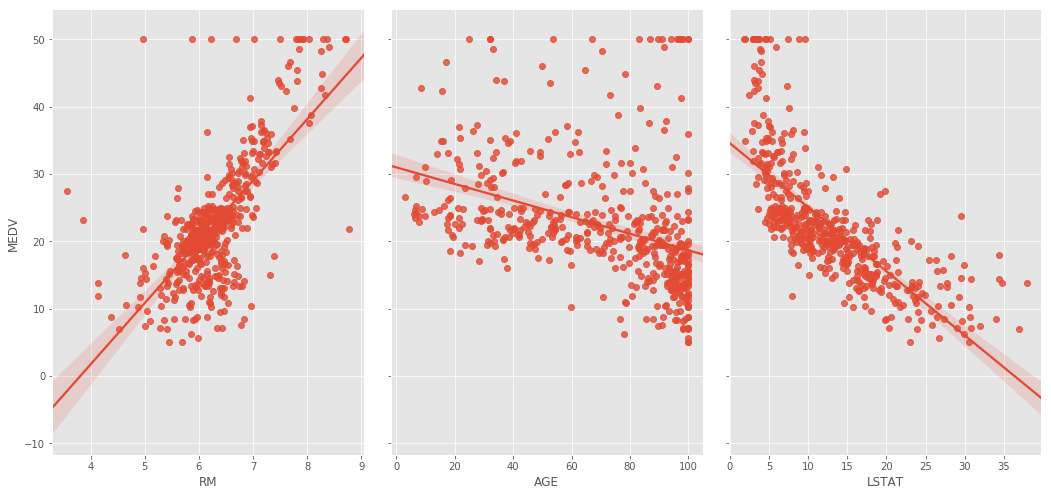

In [27]:
sns.pairplot(boston,
            x_vars = ['RM', 'AGE', 'LSTAT'],
            y_vars = 'MEDV',
            kind = 'reg', size = 7, aspect=0.7)

Specifically for `LSTAT`:

We will start by first plotting observations onto a scatter plot with a simple linear regression line, with `MEDV` as the __response (y)__ and `LSTAT` as the __predictor__.


The simple linear regression formula to indicate this relationship is:
    
`MEDV` ≈ $\beta_{0} + \beta_{1} x$ `LSTAT`

beta = [ 34.554 , -0.95 ]
R=-0.738, 
p_value=0.000, 
stderr=0.039


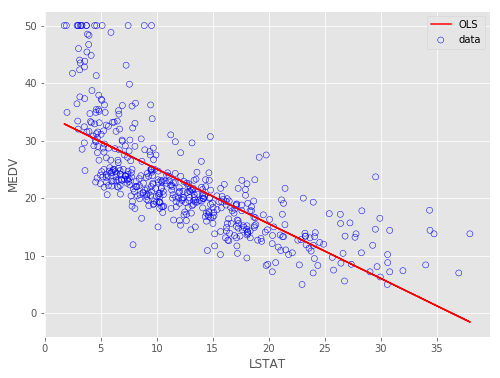

In [31]:
# https://nbviewer.jupyter.org/github/mscaudill/IntroStatLearn/blob/master/notebooks/Ch3_Linear_Regression/Lab_Linear_Regression.ipynb
# create a figure to plot our data and OLS estimate
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(boston.LSTAT.values, boston.MEDV.values, facecolors='none',
          edgecolors='b', label='data')
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')

# call scipy linregress returning fit coefficients and simple statistics
beta1, beta0, r_value, p_value, stderr = stats.linregress(boston.LSTAT.values,
                                                         boston.MEDV.values)

# add the estimation to the data plot
ax.plot(boston.LSTAT.values, beta0 + beta1 * boston.LSTAT.values,
       color = 'r', label = 'OLS')
ax.legend(loc='best')

# print the regression estimates and returned from scipy
print('beta = [', round(beta0,3), ',', round(beta1,3),']')
print('R={0:.3f}, \np_value={1:.3f}, \nstderr={2:.3f}'.format(r_value, p_value, stderr))

#### Scatter Plot Interpretation
It can been seen that the relationship between `MEDV` and `LSTAT` has the following characteristics:

- __Direction:__ Negative _(e.g., as `LSTAT` decreases so does `MEDV`)_
- __Shape:__ Roughly linear _(e.g., the points appear to fall along a straight line)
- __Strength:__ Reasonable Strong (r=-0.738) _(e.g., there is considerabl scatter about the linear line)_


### Estimating Regression Coefficient
Now we define a linear regression model with `MEDV` as the response and the `LSTAT` column as the feature in the `boston` dataset.

In [32]:
# OLS Model Output

#create fitted model
lm = smf.ols(formula='MEDV ~ LSTAT', data = boston).fit()

print(lm.params,'\n')
print(lm.summary()) # data about the model is stored in summary

Intercept    34.553841
LSTAT        -0.950049
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           5.08e-88
Time:                        05:06:34   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

#### Interpreting Model Coefficients
In both outputs we can see the model coefficients, we can cinterprete the `LSTAT`* β1 coefficient as: __A unit decrease in `LSTAT` is associated with a decrease in the `median house value`

*recall `lstat` - percent of household with low socioeconomic status



#### Accessing Individual attributes and methods
We can get detailed information directly from the model output, independently like this:

In [39]:
print("rsquared    = ", lm.rsquared)
print("f-statistic = ", lm.fvalue)
print("Intercept   = ", lm.params.Intercept)
print("LSTAT       = ", lm.params.LSTAT)

rsquared    =  0.5441462975864797
f-statistic =  601.6178711098953
Intercept   =  34.55384087938309
LSTAT       =  -0.9500493537579902


For a complete list of attributes and methods of the [RegressionResults](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html?highlight=regressionresults) object, see: .

## Using the Model for Predictions


### Method 1 - Predict Response

In [44]:
# Statsmodel - prediction for new observation
lm.predict(pd.DataFrame({'LSTAT':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

### Method 2 - Predict Response
we can also first, set up a dataframe containing the `LSTAT` values for which we want to predict a response:

In [42]:
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns = ['Intercept', 'LSTAT'])

Now we just call `.predict()` method:

In [43]:
lm.predict(new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

### Method 3 : Predict + Confidence Interval

we can just run the `summary_frame()` [function](https://github.com/statsmodels/statsmodels/issues/987#issuecomment-133575422) and the `get_prediction()` [function](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.get_prediction.html) to get the confidenc interval and the prediction interval.

In [69]:
lm.get_prediction(new).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


#### Interpretation of the Prediction and CI Result

The __95% confidence interval__ associated with `LSTAT` value of 10 is (23.18, 26.92) and the 95% __prediction interval__ is (12.83, 37.28). As expected, the __confidence and prediction intervals are centered around the same point ( a prediction value of 25.05 for `MEDV` when `LSAT` equals 10)__, the the latter are substatially wider. 

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Relationship-between-prediction-actual-value-and-prediction-interval.png)

We can also plot the residuals against the fitted values:

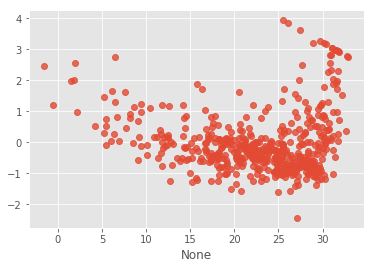

In [61]:
# use lm.resid_pearson to have a NORMALIZED RESIDUAL
sns.regplot(lm.fittedvalues, lm.resid_pearson, fit_reg=False)

We can alos look for points with __High Leverage:__

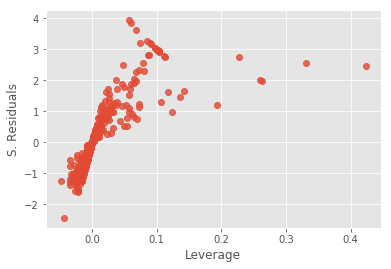

In [63]:
from statsmodels.stats.outliers_influence import OLSInfluence

sns.regplot(pd.Series(OLSInfluence(lm).influence, name = "Leverage"), 
           pd.Series(lm.resid_pearson, name="S. Residuals"),
           fit_reg=False)

### Method 5 : Weighted Least Squares Prediciton and CI

`statsmodels` includes functions for getting the prediction and confidence internvals using the `wls_prediction_std()` function which is the __Weigghted Least Squares__

http://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html

In [51]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Get prediction interval for a given x
prstd, iv_l, iv_u = wls_prediction_std(lm)


In [54]:
# Statsmodels also includes confidence intervals for the fitted values
# .. e.g., the mean fits
from statsmodels.stats.outliers_influence import summary_table

# call the summary table at a (1-alpha)100% confidence interval lelve
simpleTable, data, column_names = summary_table(lm, alpha=0.05)

# Data contains the confidence intervals we want but we need ot make sure
# .. we get the right colums so lets pring off the names
column_names

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [56]:
# get confidence intervals for a given x
predicted_mean_ci_low, predicted_mean_ci_high = data[:,4:6].T
#print("predicted mean CI Low: ", predicted_mean_ci_low)
#print("predicted mean CI High: ", predicted_mean_ci_high)

Text(0,0.5,'MEDV')

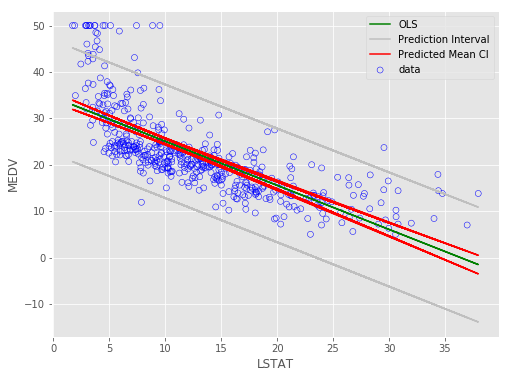

In [57]:
# create a plot to plot the data, OLS estimate, prediction and confidence interv
fig, ax = plt.subplots(figsize=(8, 6))

# get numpy array values from dataframe
x = boston.LSTAT.values
y = boston.MEDV.values

# plot the data
ax.scatter(x, y, facecolors='none', edgecolors='b', label='data')

# plot the models fitted values
ax.plot(x, lm.fittedvalues, 'g', label="OLS")

# plot the high and low prediction intervals
ax.plot(x, iv_u, color='0.75', label = "Prediction Interval")
ax.plot(x, iv_l, color='0.75')

# plot the high and low mean confidence intervals
ax.plot(x, predicted_mean_ci_low, 'r', label="Predicted Mean CI")
ax.plot(x, predicted_mean_ci_high, 'r')

ax.legend(loc='best')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

### Diagnostic Plots for Linear Model

Text(0.5,0,'fitted values')

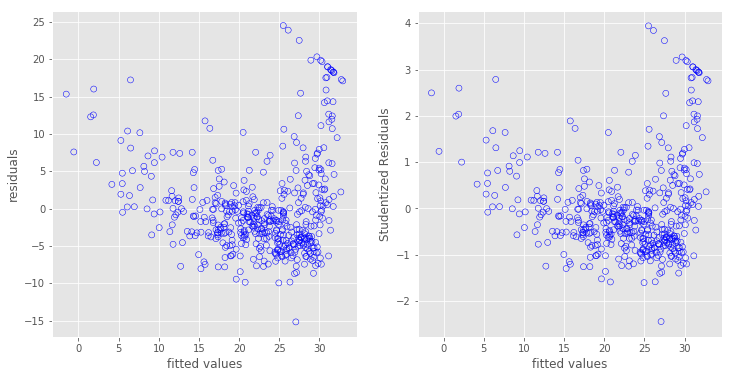

In [70]:
# Create plots of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

## RESIDUALS ##
# the lm model results contain the residuals
fitted_values = lm.fittedvalues.values
residuals = lm.resid.values

# plot the residual for each fitted value
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
# the residual plot indicates significant nonlinearity (a u-shape pattern is clear)


## STUDENTIZED RESIDUALS ##
# to access data outliers we will look at the studentized residuals. This is in
# .. the array returned from summary table (10th column)
studentized_residuals = data[:,10]

# Plot the studentized residuals
ax2.scatter(fitted_values,studentized_residuals, facecolors='none', edgecolors='b')
ax2.set_ylabel('Studentized Residuals')
ax2.set_xlabel('fitted values')

# |studentized residual| > 3 are generally considered outliers

#### Interpretation of the Diagnostic Plots for Linear Model
- the Residual plot indicates __significant nonlinearity__ as it is clear we can see a _u-shaped pattern_

- the Studentized observations > 3 are generally __considered outliers__

#### Plot Leverage Points

We can also examine the leverages to identify points that may alter the regression line

Text(0,0.5,'Studentized Residuals')

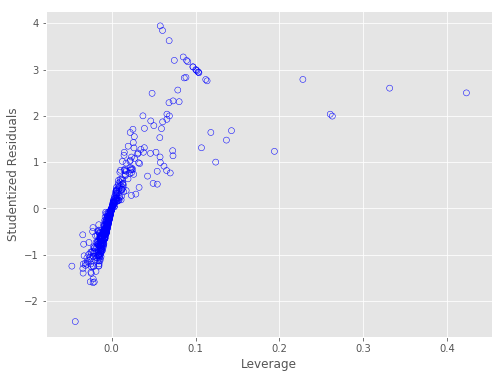

In [72]:
from statsmodels.stats.outliers_influence import OLSInfluence

leverage = OLSInfluence(lm).influence
studentized_residuals = data[:,10]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, studentized_residuals,facecolors='none', edgecolors='b')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

---
# 3.6.3 Multiple Linear Regression
In order to fit a multiple linear regression model using least quares, we use `smf.ols()` to fit the __linear model__ with the syntax as `y ~ x1 + x2 + x3)` is used to fit a model with __three predictors__. 

Model Parameters: 
 const    33.222761
LSTAT    -1.032069
AGE       0.034544
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           2.98e-88
Time:                        06:50:44   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

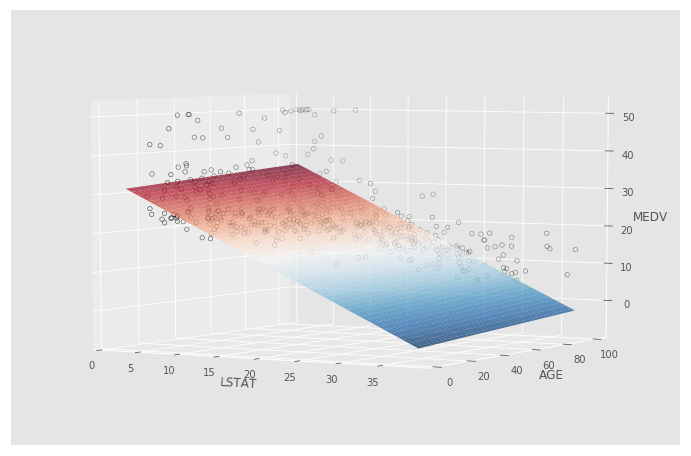

In [94]:
# create our deign matrix using 2 predictors LSTAT and AGE
X = sm.add_constant(boston[['LSTAT', 'AGE']])

# set the dependent variable 
Y = boston.MEDV

# https://nbviewer.jupyter.org/github/mscaudill/IntroStatLearn/blob/master/notebooks/Ch3_Linear_Regression/Lab_Linear_Regression.ipynb
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d',azim=-60, elev=5)

# create the model instance and estimate
lm2 = sm.OLS(Y, X).fit()


# Plot the data
ax.scatter(X.loc[:,'LSTAT'], X.loc[:,'AGE'], Y.values, facecolors=(0,0,0,0),\
           edgecolor='k', depthshade=True);
ax.set_xlabel('LSTAT');
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')

# Plot the OLS estimate
# create a grid of points
xx1, xx2 = np.meshgrid(np.linspace(X.LSTAT.min(), X.LSTAT.max(), 100), 
                       np.linspace(X.AGE.min(), X.AGE.max(), 100))

# plot the plane by evaluating the parameters over the grid
Z = lm2.params[0] + lm2.params[1] * xx1 + lm2.params[2] * xx2
# plot plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.75, linewidth=0)


print("Model Parameters: \n", lm2.params,'\n')
print(lm2.summary()) # data about the model is stored in summary

The `Boston` dataset contains 13 variables, so it would be cumbersome to have to type all of these in order to perform a regression using all the predictors. Instead, we can use the following as a short-hand:

In [95]:
# create our deign matrix using all the predictor variables 
# .. the last column is MEDV
X = sm.add_constant(boston.iloc[:,0:-1])

# create the model instance and estimate
lm2 = sm.OLS(boston.MEDV, X).fit()

print(lm2.params,'\n')

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64 



we can use the `join()` function to exclude the `MEDV` response variable using the same syntax for regression just as we did before for simple linear regression. 

In [97]:
# or we can use the fourmla to define the linear model

lm2 = sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.columns.difference(['MEDV'])), boston).fit()

print(lm2.summary()) # data about the model is stored in summary

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          6.95e-135
Time:                        06:54:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

### Resources:
- [jcrouser lab2 notebook](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab2-py.html)
- [Prediction Intervals for Machine Learning - Machine Learning Mastery](https://machinelearningmastery.com/prediction-intervals-for-machine-learning/)